In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score,classification_report
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name=1)
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [4]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

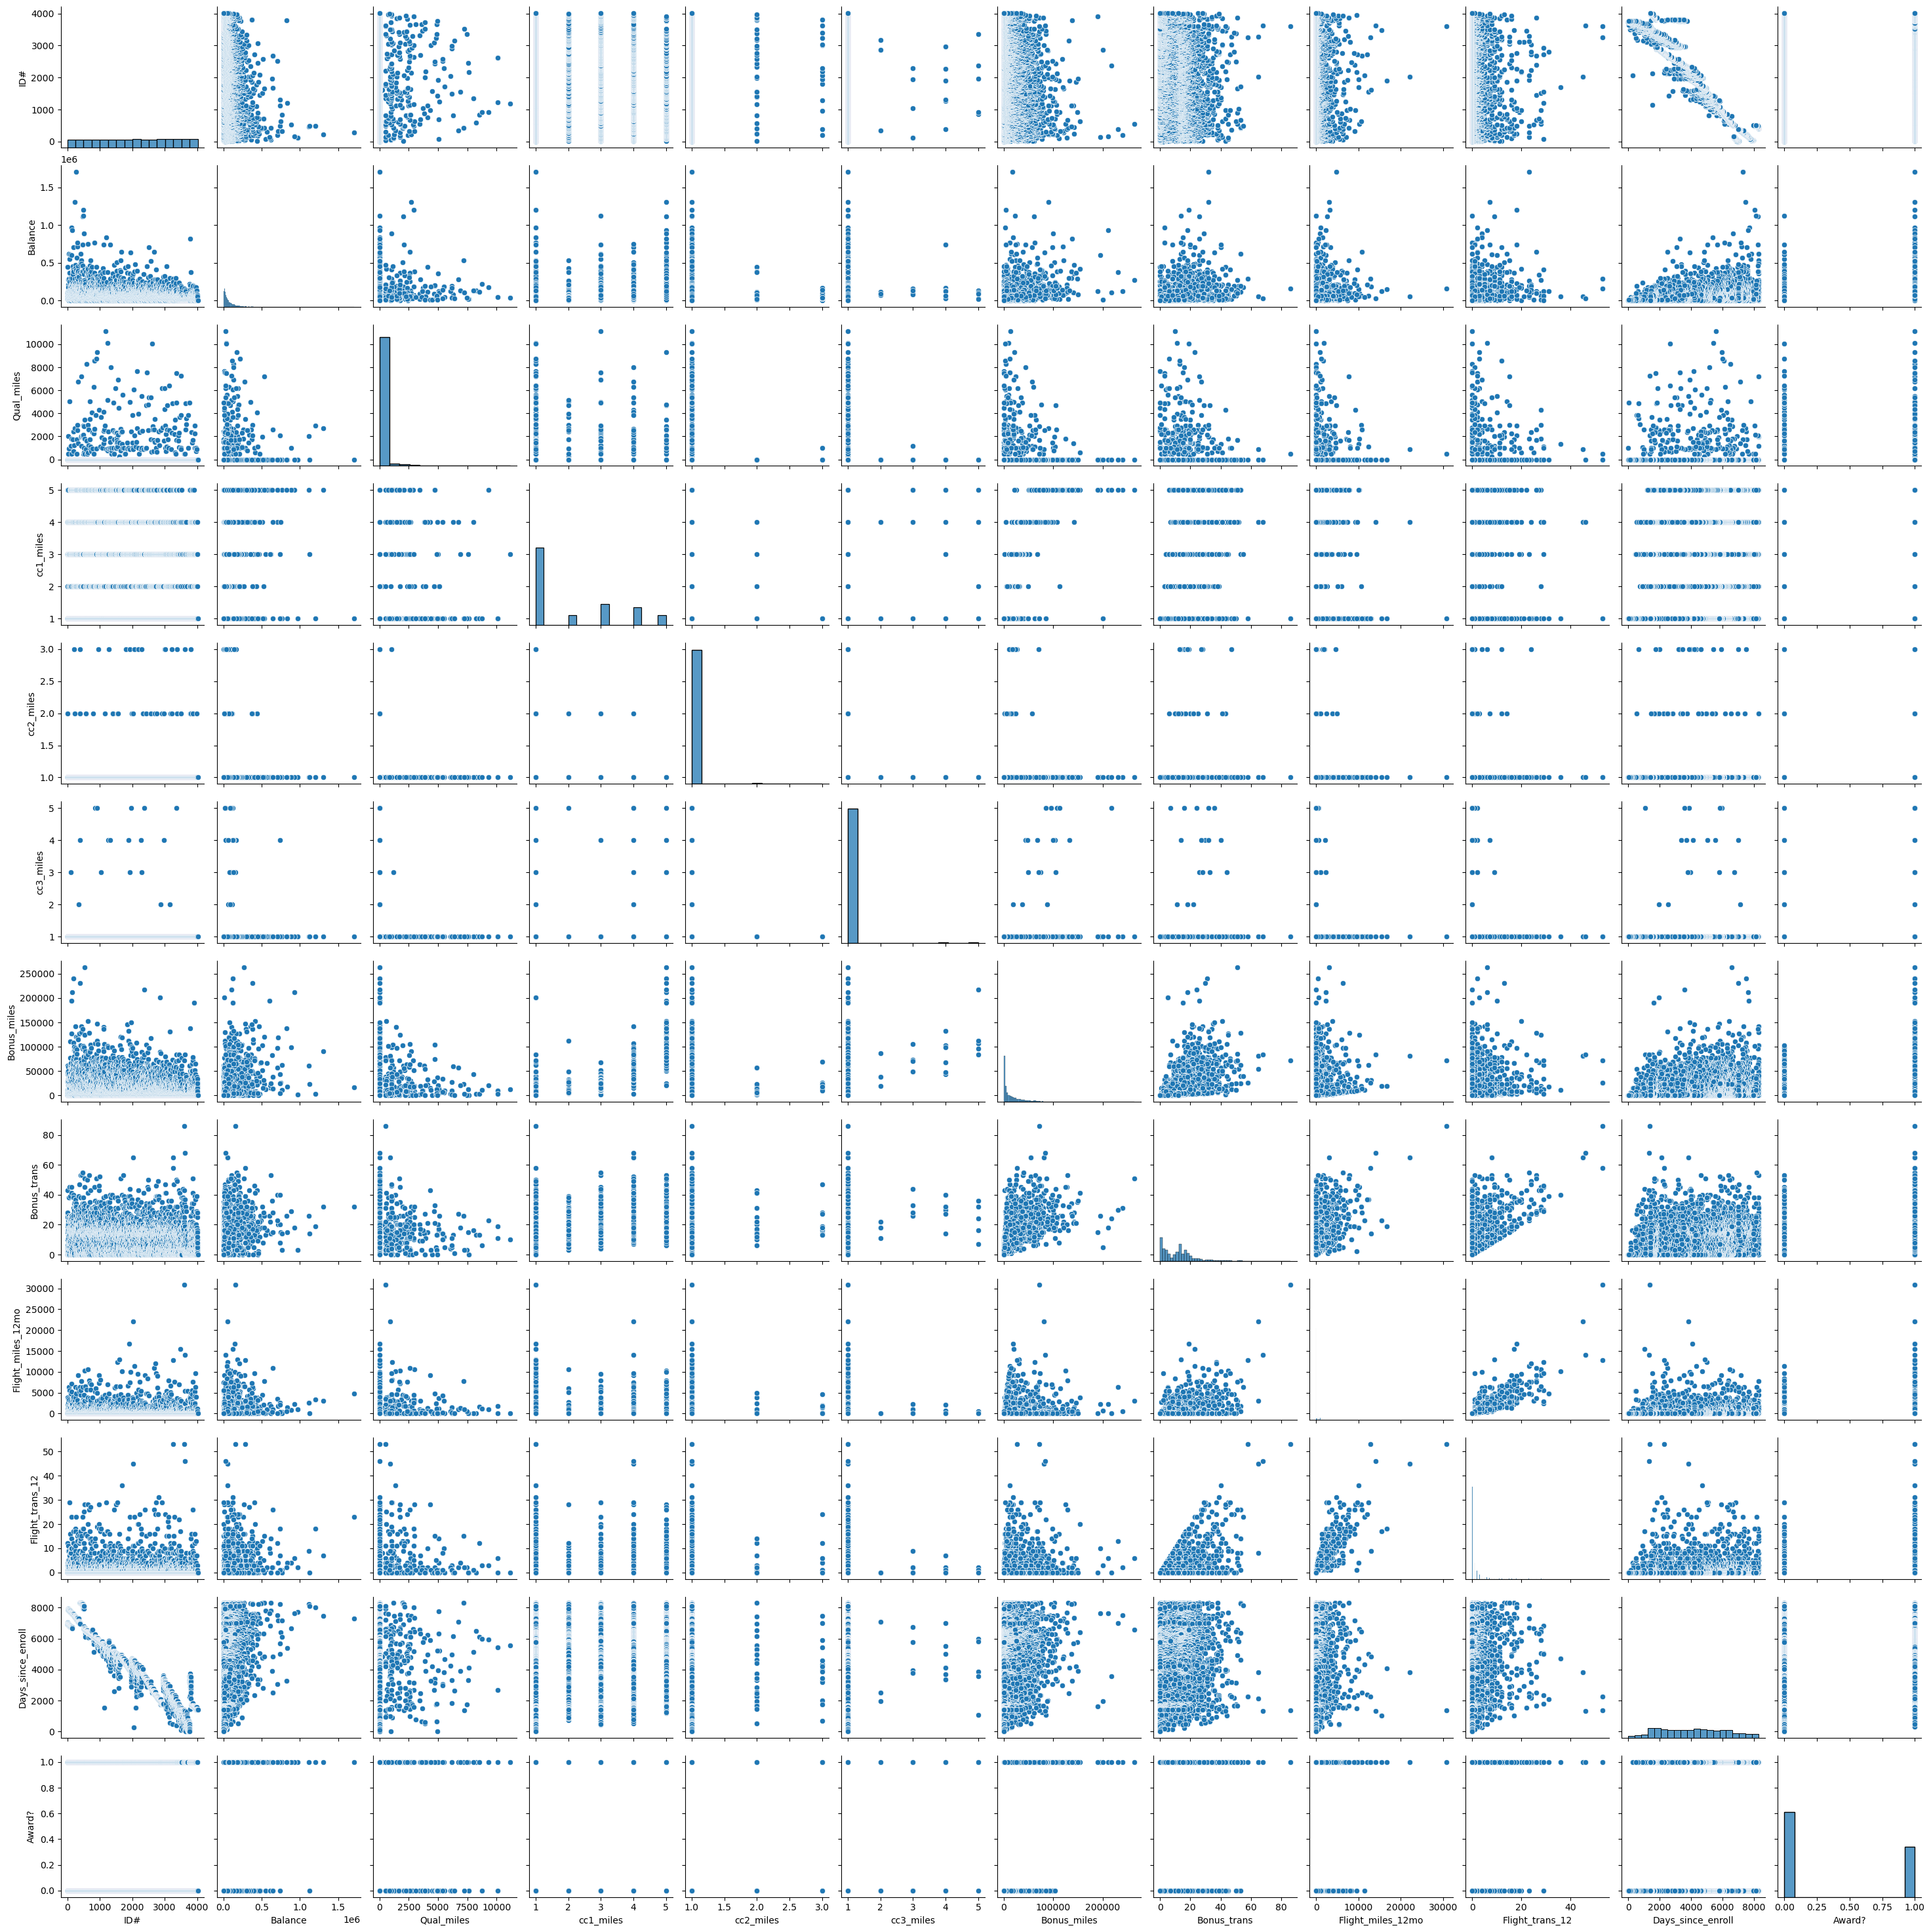

In [7]:
sns.pairplot(data=df);

In [8]:
df.rename(columns={'Award':'Award'},inplace=True)

In [9]:
x=df

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [12]:
from scipy.cluster import hierarchy

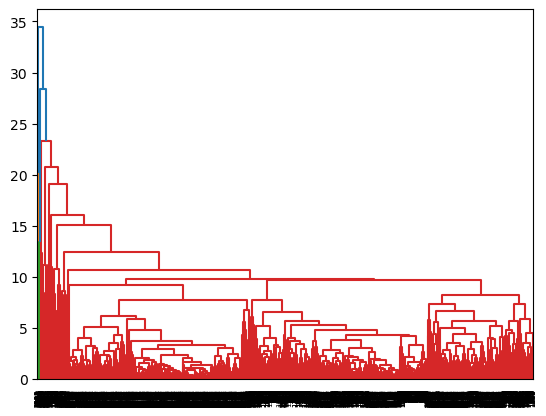

In [13]:
he = hierarchy.linkage(x,method='complete')
dedo = hierarchy.dendrogram(he)

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
ag=AgglomerativeClustering(n_clusters=4)
y= ag.fit_predict(x)

In [16]:
silhouette_score(x,y)

0.21135914614865942

In [17]:
df['cluster']=y
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        0

In [18]:
x=pd.DataFrame(x)

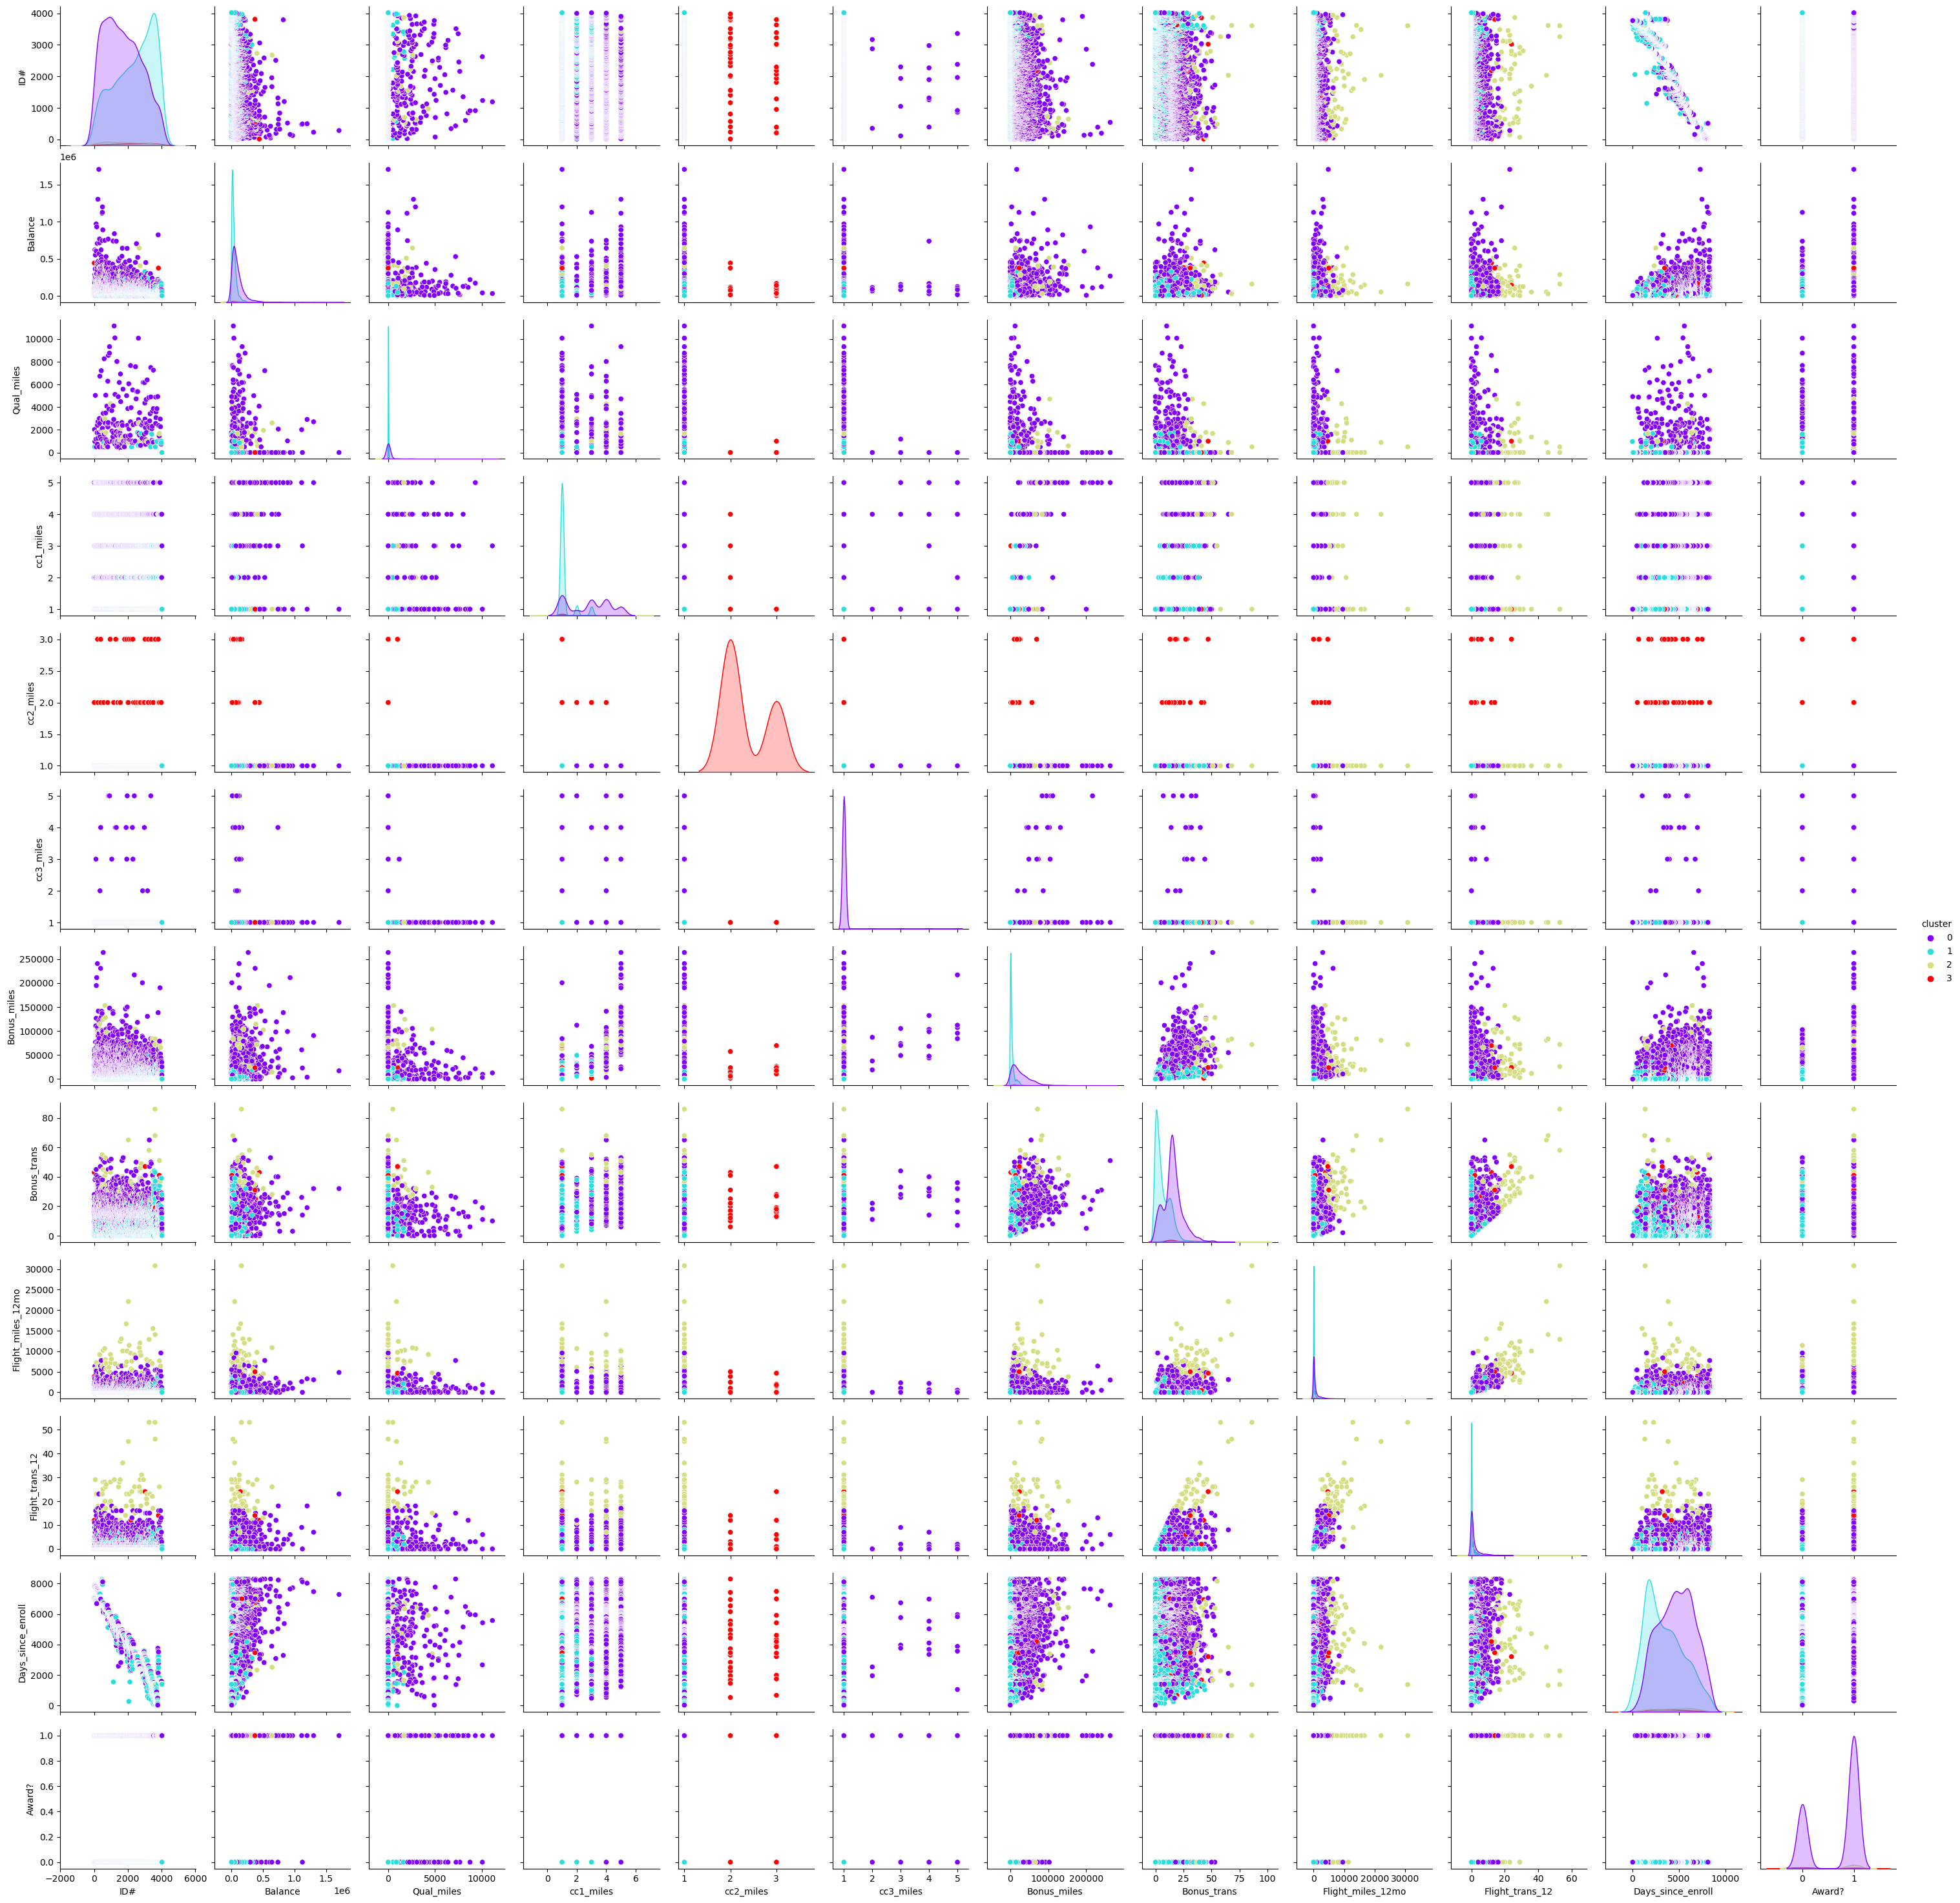

In [19]:
sns.pairplot(df,hue='cluster',palette='rainbow')

In [20]:
df.groupby(by='cluster').mean()

ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
cluster                                                                 
0        1695.729575  101523.403727  249.498806   2.817965   1.000000   
1        2388.934444   38220.721111    9.431667   1.183889   1.000000   
2        1752.952381  160067.206349  573.587302   2.507937   1.000000   
3        2269.372093   68876.581395   23.255814   1.139535   2.348837   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
cluster                                                            
0         1.023411  27927.157191    15.414238         523.954133   
1         1.000000   3770.797222     6.238333         113.728333   
2         1.000000  42723.841270    34.142857        8148.619048   
3         1.000000  14689.837209    17.534884         582.627907   

         Flight_trans_12  Days_since_enroll    Award?  
cluster                                                
0               1.573340        4701.668896  0.673196  
1               0.383889        3429.802778  0.000000  
2              22.444444        4527.253968  0.873016  
3               2.209302        3968.930233  0.395349

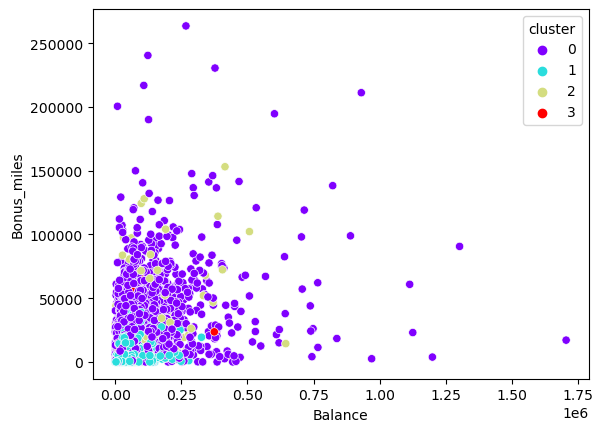

In [21]:
sns.scatterplot(df['Balance'],df['Bonus_miles'],hue=df['cluster'],palette='rainbow');

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=2)

In [24]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)

In [25]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       434
           1       0.94      0.99      0.97       345
           2       0.83      0.83      0.83        12
           3       1.00      1.00      1.00         9

    accuracy                           0.97       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.97      0.97      0.97       800



In [26]:
from sklearn.cluster import KMeans

In [27]:
km=KMeans()
y=km.fit_predict(x)

In [28]:
silhouette_score(x,y)

0.2529869577030344

In [29]:
wcss=[]
for i in range(2,20):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [30]:
wcss

[39018.83855429649,
 34529.128893902795,
 30616.623636092623,
 26894.75305989323,
 23499.167336031827,
 21888.1029145468,
 19330.110302968988,
 18014.64554447709,
 16768.453810026313,
 15838.810146232921,
 15076.90455482488,
 14179.242660727356,
 13589.896810956354,
 13118.867315109957,
 12777.396415434292,
 12154.962375363068,
 11735.30386902697,
 11434.353893192274]

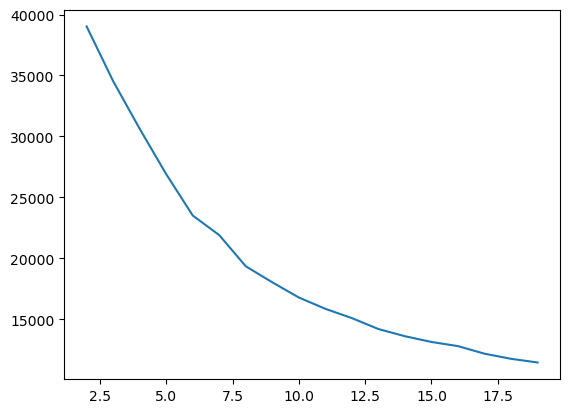

In [31]:
plt.plot(range(2,20),wcss);

In [32]:
km=KMeans(n_clusters=6)
y=km.fit_predict(x)

In [33]:
silhouette_score(x,y)

0.24719094083089332

In [34]:
df['kcluster']=y

In [35]:
df.groupby(by='kcluster').mean()

ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
kcluster                                                                 
0         1559.416505  125356.516505  165.946602   3.923301   1.000000   
1         3140.114820   39633.241656   97.437250   1.367824   1.000000   
2         1096.028169   57375.605634  106.979656   1.355243   1.000000   
3         2269.372093   68876.581395   23.255814   1.139535   2.348837   
4         1658.459259  203594.540741  892.785185   2.318519   1.000000   
5         1664.866667  138061.400000   78.800000   3.466667   1.000000   

          cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
kcluster                                                            
0          1.001942  44110.872816    19.315534         379.421359   
1          1.000000   5998.439920     7.622163         218.774366   
2          1.000782   5731.258216     7.841158         238.967136   
3          1.000000  14689.837209    17.534884         582.627907   
4          1.000000  35387.029630    28.792593        5801.348148   
5          4.066667  93927.866667    28.066667         506.666667   

          Flight_trans_12  Days_since_enroll    Award?   cluster  
kcluster                                                          
0                1.143689        4933.212621  0.701942  0.000000  
1                0.643525        2137.040053  0.196929  0.739653  
2                0.727700        5709.666667  0.251956  0.541471  
3                2.209302        3968.930233  0.395349  3.000000  
4               17.051852        4820.725926  0.859259  0.933333  
5                1.600000        4613.866667  0.533333  0.000000

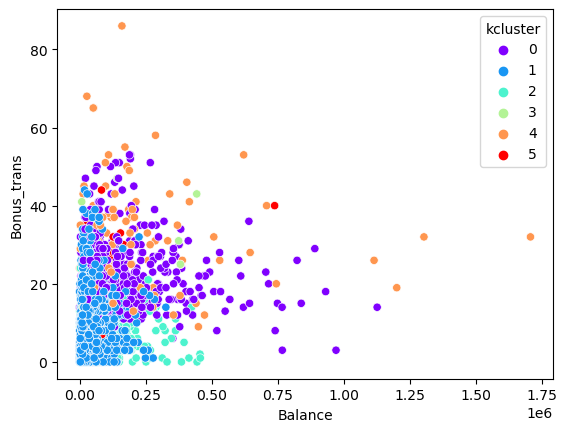

In [36]:
sns.scatterplot(df['Balance'],df['Bonus_trans'],hue=df['kcluster'],palette='rainbow');

# DBSCAN

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
db=DBSCAN()
y=db.fit_predict(x)
silhouette_score(x,y)

-0.2823258834687895

# Selecting Min_samples:
Number of columns + 1 Number of columns * 2 ++== Number of Dimension + 1 Always keep min_sample at least 3.

In [39]:
from sklearn.neighbors import NearestNeighbors

In [40]:
ne=NearestNeighbors(n_neighbors=3).fit(x)

In [41]:
d,i=ne.kneighbors(x)
d

array([[0.        , 0.13537867, 0.13743479],
       [0.        , 0.11407578, 0.13743479],
       [0.        , 0.21956162, 0.27251935],
       ...,
       [0.        , 0.19523778, 0.32719285],
       [0.        , 0.28917928, 0.33007337],
       [0.        , 0.02752204, 0.06504268]])

In [42]:
dist=np.sort(d[:,1],axis=0)

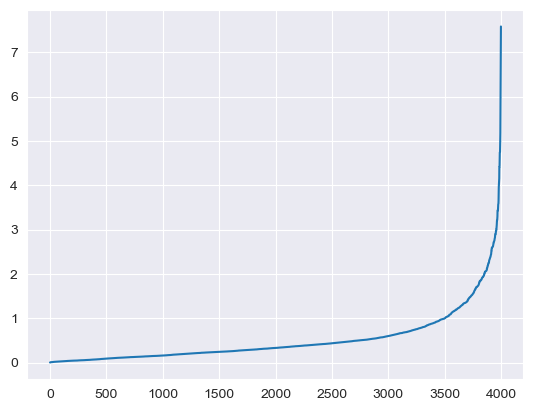

In [43]:
sns.set_style('darkgrid')
plt.plot(dist);

In [44]:
db=DBSCAN(eps=3,min_samples=12)

In [45]:
y=db.fit_predict(x)

In [46]:
silhouette_score(x,y)

0.5114910635860678

In [47]:
df["DBpred"]=y
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  cluster  kcluster  DBpred  
0          0        1         2       0  
1          0        1         2       0  
2          0        1         2       0  
3          0        1         2       0  
4          1        0         0       0  
...      ...      ...       ...     ...  
3994       1        0         1       0  
3995       1        0         1       0  
3996       1        0         1       0  
3997       0        1         1       0  
3998       0        1         1       0  

[3999 rows x 15 columns]

In [48]:
df.groupby(by='DBpred').mean()

ID#        Balance   Qual_miles  cc1_miles  cc2_miles  \
DBpred                                                                  
-1      1644.504587  258310.568807  1658.486239   2.596330   1.302752   
 0      2022.767658   68614.794567   102.338680   2.050453   1.000000   
 1      2400.600000   39187.040000     0.000000   1.120000   2.000000   

        cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
DBpred                                                            
-1       1.449541  55618.605505    27.256881        3960.917431   
 0       1.000000  16098.870893    11.139457         362.852005   
 1       1.000000  11107.040000    14.840000         224.000000   

        Flight_trans_12  Days_since_enroll    Award?   cluster  kcluster  
DBpred                                                                    
-1            11.357798        4861.981651  0.761468  1.100917  3.091743  
 0             1.095731        4100.279948  0.359638  0.481242  1.134799  
 1             0.800000        3703.240000  0.320000  3.000000  3.000000

In [49]:
df.drop(columns=['cluster','kcluster'],inplace=True)

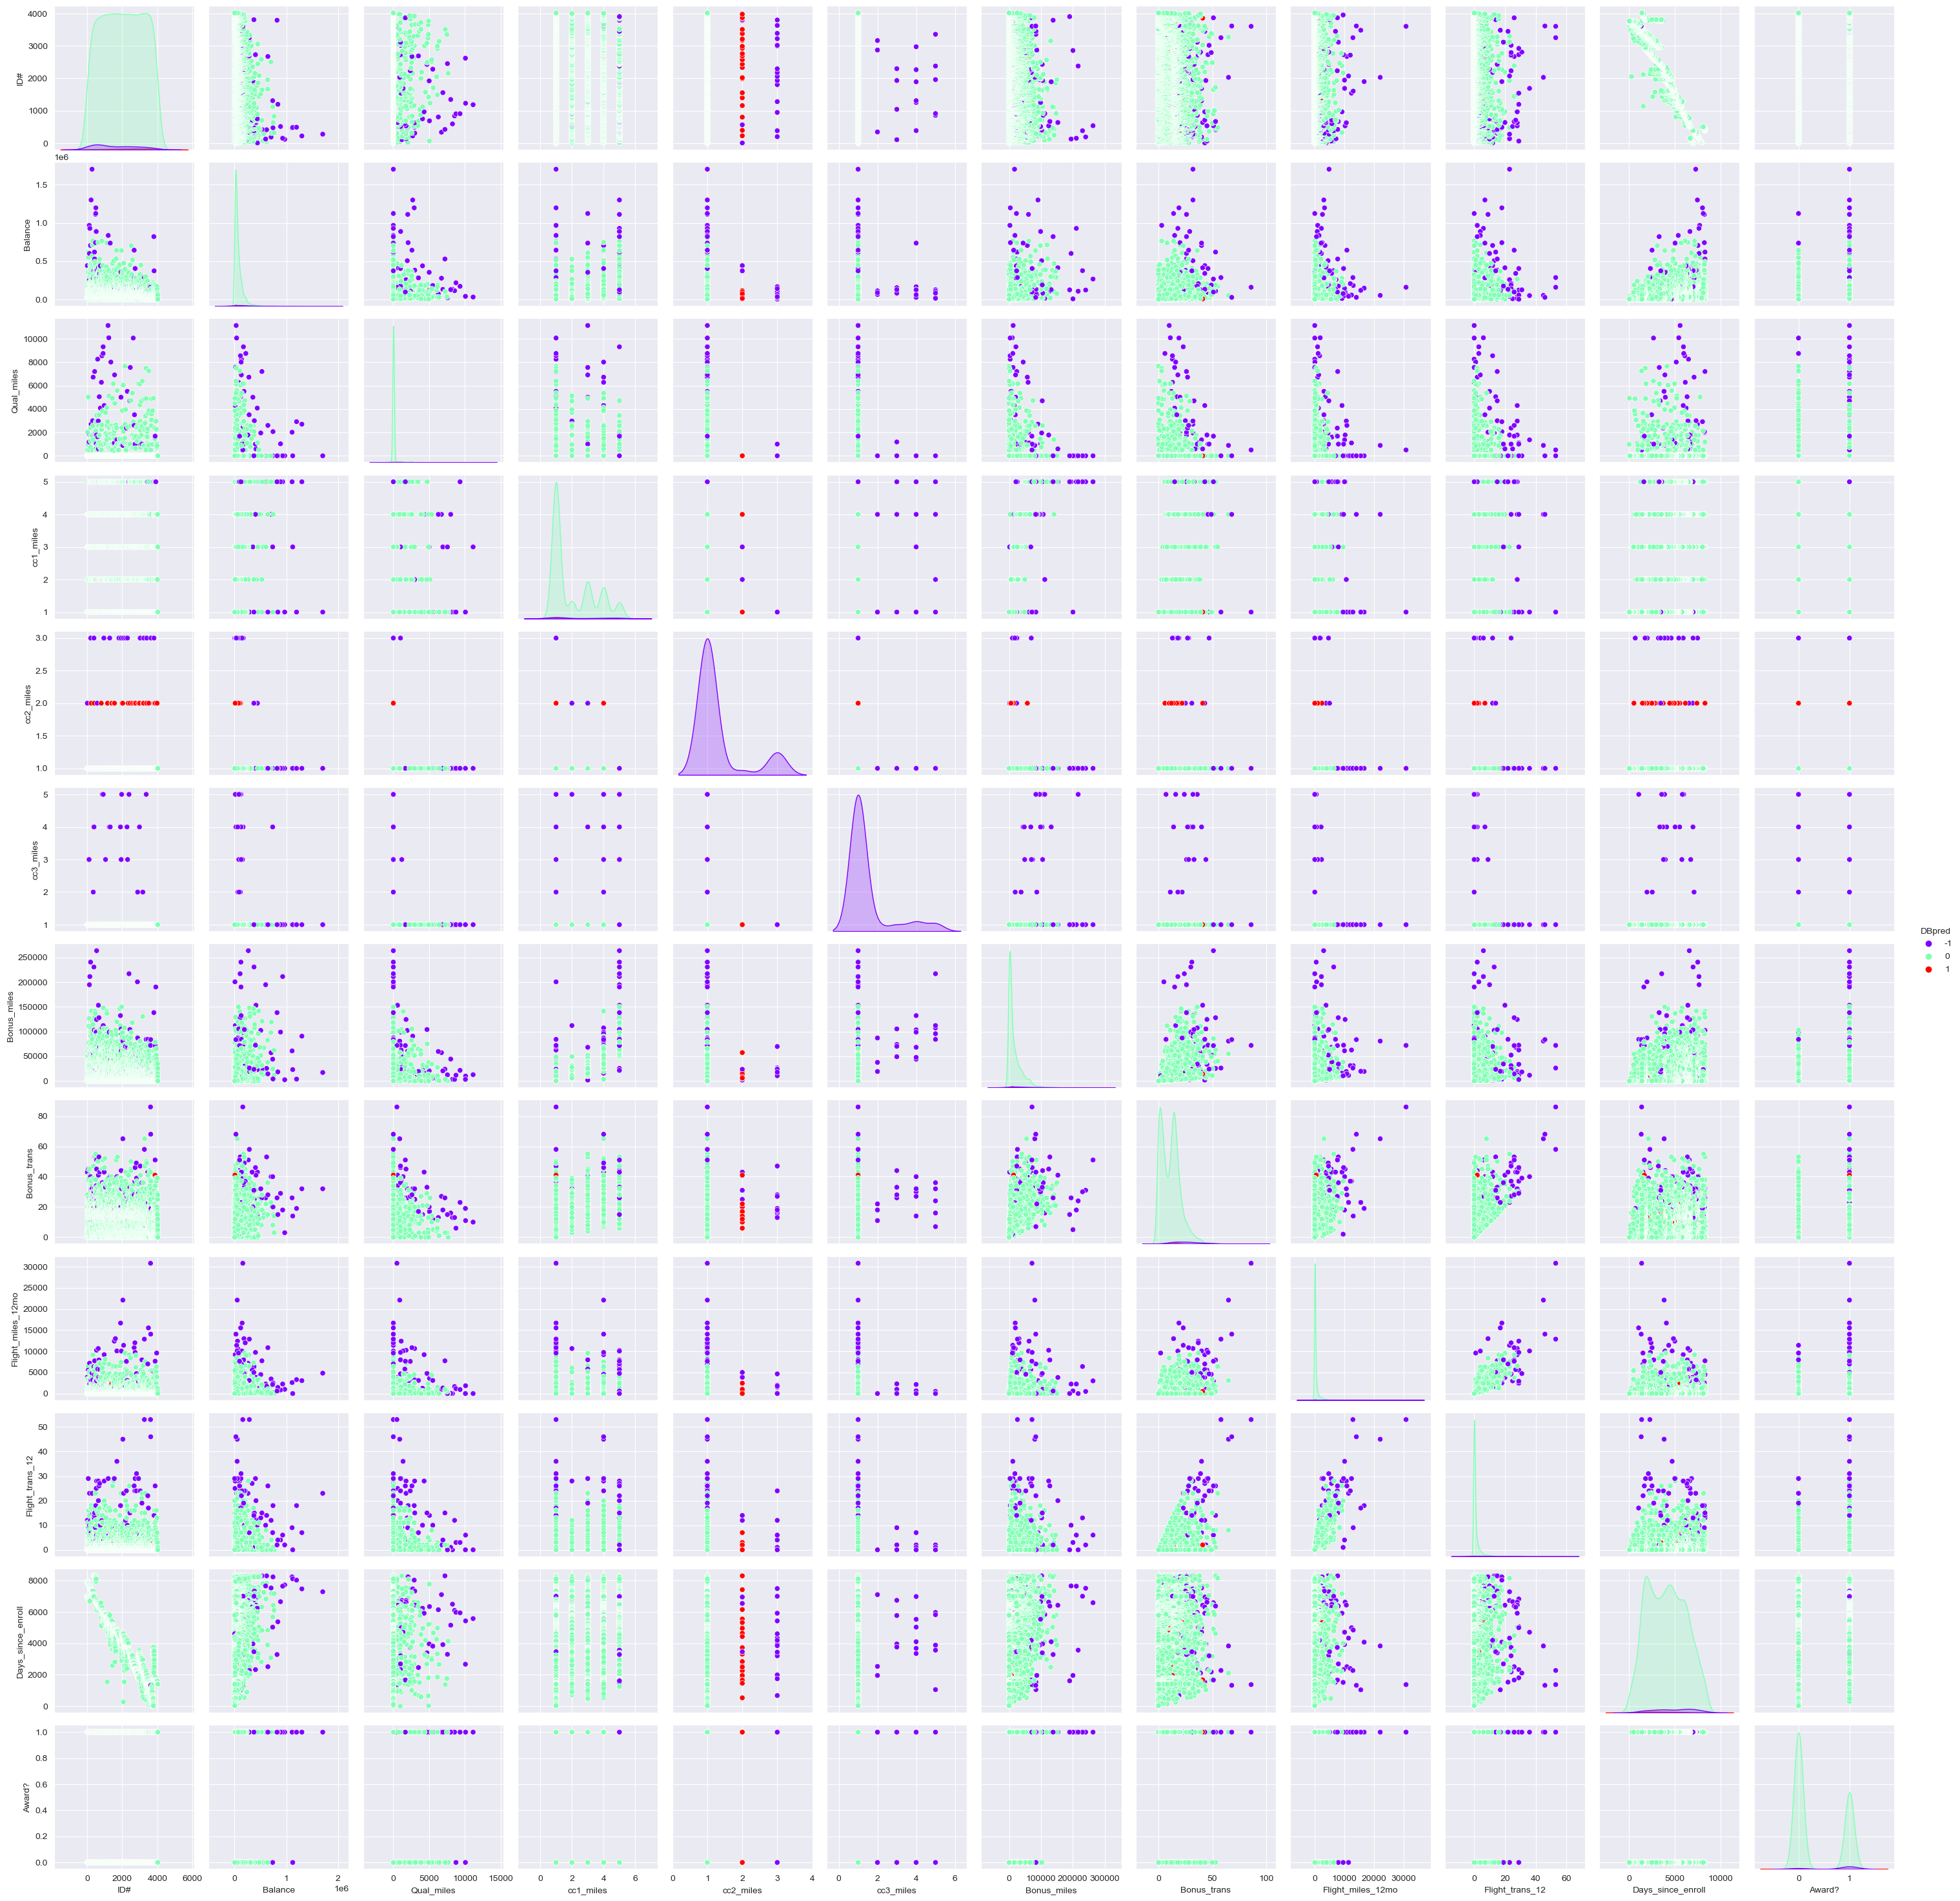

In [50]:
sns.pairplot(df,hue='DBpred',palette='rainbow');